# 3.3 Analiza napovedanih aktivnih struktur

In [1]:
%run __A_knjiznice.py

# Import specific elements from the script
from __A_knjiznice import *
from __B_funkcije import *
import __C_konstante as kon

## Molekule modela RF

In [2]:
best_molecules_rf = pd.read_csv(f'{kon.path_files}/podatki_napoved/most_active_filtered_rf_all.csv')
molecules_rf = best_molecules_rf[['Smiles', 'Predicted_Activity', 'Probability_Active']]
molecules_rf

,Smiles,Predicted_Activity,Probability_Active
0,C[C@@H](NC(=O)c1ccc(Cl)cc1)[C@H]1CC[C@H](CC1)c...,1,0.970152
1,NS(=O)(=O)NCCNc1nonc1\C(Nc1ccc(F)c(Br)c1)=N\O,1,0.950978
2,NS(=O)(=O)NCCNc1nonc1C(Nc1ccc(F)c(Br)c1)=NO,1,0.950978
3,NS(=O)(=O)NCCNc1nonc1\C(Nc1ccc(F)c(Br)c1)=N/O,1,0.950978
4,NCCNc1nonc1\C(Nc1ccc(F)c(Br)c1)=N/O,1,0.948135
...,...,...,...
2382,CC1(C)CC1(C(=O)Nc1ccc(CC(=O)NC2CC2)cc1)c1ccc(F...,1,0.693036
2383,Fc1ccc(cc1)N1CCCC2(CCN(CC2)C(=O)CCc2ccccc2)C1=O,1,0.693031
2384,CC(C)CC(=O)N1CCc2cc(CNC(=O)c3cccc(Cl)c3)ccc12,1,0.693000
2385,Cc1nccn1Cc1cccc(c1)C(=O)N1CCCC2(CN(C(=O)O2)c2c...,1,0.692996


## Molekulski prstni odtisi rdkit empiricno dokazanih aktivnih molekul

In [3]:
import pandas as pd

# Load the CSV file
input_dir = f'{kon.path_files}/molekulski_prstni_odtisi/df_rdkit.csv'
df = pd.read_csv(input_dir)

# Filter rows where Activity = 1
proven_active = df[df['Activity'] == 1]
proven_active.iloc[:, 2:]

,Activity,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,...,Bit_2038,Bit_2039,Bit_2040,Bit_2041,Bit_2042,Bit_2043,Bit_2044,Bit_2045,Bit_2046,Bit_2047
0,1,1,0,1,1,0,1,0,1,1,...,1,0,0,1,0,1,0,1,1,1
1,1,1,1,0,0,0,1,1,0,1,...,1,0,0,1,0,1,0,1,0,1
2,1,0,1,1,0,0,0,1,0,1,...,0,1,0,0,0,1,0,1,0,1
3,1,1,0,0,1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,1,1,1,1,0,0,1,0,1,1,...,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2098,1,1,0,1,1,1,0,1,0,1,...,0,0,1,0,0,1,1,0,1,1
2099,1,1,0,1,1,0,0,1,0,0,...,1,0,0,1,0,1,1,0,0,1
2100,1,1,1,0,1,1,1,1,1,1,...,1,1,0,1,0,1,1,1,1,1
2101,1,1,0,1,1,0,0,1,0,0,...,1,0,0,1,0,1,1,0,0,1


## Molekulski prstni odtisi rdkit napovedanih aktivnih molekul

In [4]:
predicted_active, fingerprints_df = calc_fingerprints(molecules_rf, 'rdkit')
predicted_active.iloc[:, 1:]

,Predicted_Activity,Probability_Active,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,...,Bit_2038,Bit_2039,Bit_2040,Bit_2041,Bit_2042,Bit_2043,Bit_2044,Bit_2045,Bit_2046,Bit_2047
0,1,0.970152,1,1,0,0,0,1,0,0,...,1,1,0,1,0,0,0,0,0,1
1,1,0.950978,1,0,1,1,0,0,1,0,...,0,0,0,1,0,1,1,0,0,1
2,1,0.950978,1,0,1,1,0,0,1,0,...,0,0,0,1,0,1,1,0,0,1
3,1,0.950978,1,0,1,1,0,0,1,0,...,0,0,0,1,0,1,1,0,0,1
4,1,0.948135,1,0,1,0,0,0,1,0,...,0,0,0,1,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2382,1,0.693036,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2383,1,0.693031,0,0,0,0,0,1,0,1,...,0,1,0,1,0,0,0,0,0,1
2384,1,0.693000,0,1,1,0,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
2385,1,0.692996,0,1,1,0,0,1,1,0,...,0,1,0,0,0,1,1,0,0,1


## Tanimoto podobnost

In [5]:
import numpy as np
import pandas as pd

# Extract relevant columns as numpy arrays
proven_bits = proven_active.iloc[:, 3:].values
predicted_bits = predicted_active.iloc[:, 3:].values

# Compute Tanimoto similarity efficiently using broadcasting
intersection = np.dot(predicted_bits, proven_bits.T)  # Pairwise AND
sum_predicted = np.sum(predicted_bits, axis=1).reshape(-1, 1)  # Sum of predicted bits (row-wise)
sum_proven = np.sum(proven_bits, axis=1).reshape(1, -1)  # Sum of proven bits (column-wise)

union = sum_predicted + sum_proven - intersection  # Pairwise OR
tanimoto_similarity = intersection / union  # Tanimoto similarity matrix

# Find the maximum similarity for each predicted molecule (max similarity to any proven molecule)
max_similarity = tanimoto_similarity.max(axis=1)

# Find the average similarity for each predicted molecule (avg similarity to all proven molecules)
avg_similarity = tanimoto_similarity.mean(axis=1)


# Add both the max and avg Tanimoto similarity columns to predicted_active
predicted_active['Max_Tanimoto_Similarity'] = max_similarity
predicted_active['Avg_Tanimoto_Similarity'] = avg_similarity

# Optionally return the DataFrame for further use
predicted_active

,Smiles,Predicted_Activity,Probability_Active,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,...,Bit_2040,Bit_2041,Bit_2042,Bit_2043,Bit_2044,Bit_2045,Bit_2046,Bit_2047,Max_Tanimoto_Similarity,Avg_Tanimoto_Similarity
0,C[C@@H](NC(=O)c1ccc(Cl)cc1)[C@H]1CC[C@H](CC1)c...,1,0.970152,1,1,0,0,0,1,0,...,0,1,0,0,0,0,0,1,1.000000,0.324924
1,NS(=O)(=O)NCCNc1nonc1\C(Nc1ccc(F)c(Br)c1)=N\O,1,0.950978,1,0,1,1,0,0,1,...,0,1,0,1,1,0,0,1,1.000000,0.400905
2,NS(=O)(=O)NCCNc1nonc1C(Nc1ccc(F)c(Br)c1)=NO,1,0.950978,1,0,1,1,0,0,1,...,0,1,0,1,1,0,0,1,1.000000,0.400905
3,NS(=O)(=O)NCCNc1nonc1\C(Nc1ccc(F)c(Br)c1)=N/O,1,0.950978,1,0,1,1,0,0,1,...,0,1,0,1,1,0,0,1,1.000000,0.400905
4,NCCNc1nonc1\C(Nc1ccc(F)c(Br)c1)=N/O,1,0.948135,1,0,1,0,0,0,1,...,0,1,0,1,1,0,0,1,1.000000,0.393721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2382,CC1(C)CC1(C(=O)Nc1ccc(CC(=O)NC2CC2)cc1)c1ccc(F...,1,0.693036,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0.628300,0.313676
2383,Fc1ccc(cc1)N1CCCC2(CCN(CC2)C(=O)CCc2ccccc2)C1=O,1,0.693031,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0.545676,0.290124
2384,CC(C)CC(=O)N1CCc2cc(CNC(=O)c3cccc(Cl)c3)ccc12,1,0.693000,0,1,1,0,0,1,1,...,0,1,0,0,0,0,0,1,0.765786,0.312737
2385,Cc1nccn1Cc1cccc(c1)C(=O)N1CCCC2(CN(C(=O)O2)c2c...,1,0.692996,0,1,1,0,0,1,1,...,0,0,0,1,1,0,0,1,0.528367,0.365031


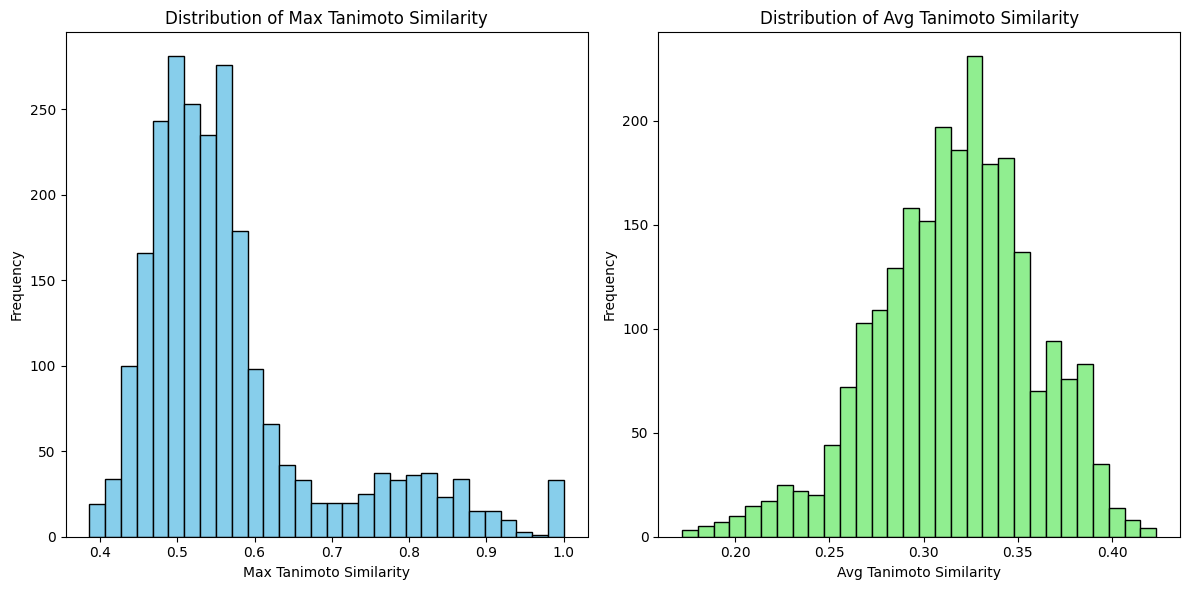

In [6]:
import matplotlib.pyplot as plt

# Plot the histogram for Max Tanimoto Similarity
plt.figure(figsize=(12, 6))

# Subplot 1: Max Tanimoto Similarity
plt.subplot(1, 2, 1)
plt.hist(predicted_active['Max_Tanimoto_Similarity'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Max Tanimoto Similarity')
plt.xlabel('Max Tanimoto Similarity')
plt.ylabel('Frequency')

# Subplot 2: Avg Tanimoto Similarity
plt.subplot(1, 2, 2)
plt.hist(predicted_active['Avg_Tanimoto_Similarity'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of Avg Tanimoto Similarity')
plt.xlabel('Avg Tanimoto Similarity')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

In [7]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors


# Define the function to calculate specific property
def calc_property(smiles, param):
    mol = Chem.MolFromSmiles(smiles)
    if mol:  # Check if molecule was successfully created
        if param == 'Molekulska_masa':
            return Descriptors.MolWt(mol)  # Molecular Weight
        elif param == 'logP':
            return Descriptors.MolLogP(mol)  # LogP
        elif param == 'Število_O_atomov':
            return sum(1 for atom in mol.GetAtoms() if atom.GetSymbol() == 'O')  # Oxygen count
        elif param == 'Število_N_atomov':
            return sum(1 for atom in mol.GetAtoms() if atom.GetSymbol() == 'N')  # Nitrogen count
        elif param == 'Akceptorji_H_vezi':
            return rdMolDescriptors.CalcNumHBA(mol)  # Hydrogen Bond Acceptors
        elif param == 'Donorji_H_vezi':
            return rdMolDescriptors.CalcNumHBD(mol)  # Hydrogen Bond Donors
        elif param == 'Število_aromatskih_obročev':
            return rdMolDescriptors.CalcNumAromaticRings(mol)  # Aromatic Rings
        elif param == 'TPSA':
            return rdMolDescriptors.CalcTPSA(mol)  # Topological Polar Surface Area
        elif param == 'Število_rotirajočih_vezi':
            return Descriptors.NumRotatableBonds(mol)  # Number of Rotatable 
        else:
            return None  # Return None for unsupported params
    else:
        return None  # Return None if the molecule is invalid

# Example: Assuming 'molecules' is your DataFrame with 'smiles' column
# molecules = pd.read_csv('your_file.csv')  # If you're loading the data


In [8]:
# List of properties to calculate and add to DataFrame
properties = ['Molekulska_masa', 'logP', 'Število_O_atomov', 'Število_N_atomov', 'Akceptorji_H_vezi', 'Donorji_H_vezi','Število_aromatskih_obročev','TPSA','Število_rotirajočih_vezi']

molecules_analysis_rf = molecules_rf.copy()

# Apply the function to each property and add the result as a new column
for prop in properties:
    molecules_analysis_rf[prop] = molecules_analysis_rf['Smiles'].apply(lambda x: calc_property(x, prop))

molecules_analysis_rf = molecules_analysis_rf.head(2000)

In [9]:
MW_stats = molecules_analysis_rf['Molekulska_masa'].describe()
logP_stats = molecules_analysis_rf['logP'].describe()
Aromatic_Rings_stats = molecules_analysis_rf['Število_aromatskih_obročev'].describe()
HBA_stats = molecules_analysis_rf['Akceptorji_H_vezi'].describe()
HBD_stats = molecules_analysis_rf['Donorji_H_vezi'].describe()
O_Count_stats = molecules_analysis_rf['Število_O_atomov'].describe()
N_Count_stats = molecules_analysis_rf['Število_N_atomov'].describe()

# Create a DataFrame to hold the statistics
stats_df_rf = pd.DataFrame({
    'Molekulska_masa': MW_stats,
    'logP': logP_stats,
    'Število_aromatskih_obročev': Aromatic_Rings_stats,
    'Akceptorji_H_vezi': HBA_stats,
    'Donorji_H_vezi': HBD_stats,
    'Število_O_atomov': O_Count_stats,
    'Število_N_atomov': N_Count_stats,
})

# Transpose the DataFrame to have the statistics as rows
stats_df_rf = stats_df_rf.transpose()
stats_df_rf

,count,mean,std,min,25%,50%,75%,max
Molekulska_masa,2000.0,402.748531,71.356659,215.2960,360.41175,396.4400,444.5555,725.6040
logP,2000.0,4.012718,1.087760,0.2333,3.25480,4.0227,4.7664,8.1717
Število_aromatskih_obročev,2000.0,2.071000,0.717786,1.0000,2.00000,2.0000,3.0000,5.0000
Akceptorji_H_vezi,2000.0,3.140500,1.263550,1.0000,2.00000,3.0000,4.0000,11.0000
Donorji_H_vezi,2000.0,1.066500,0.737122,0.0000,1.00000,1.0000,1.0000,5.0000
Število_O_atomov,2000.0,2.361500,0.972775,0.0000,2.00000,2.0000,3.0000,6.0000
Število_N_atomov,2000.0,2.571000,1.011173,1.0000,2.00000,2.0000,3.0000,8.0000


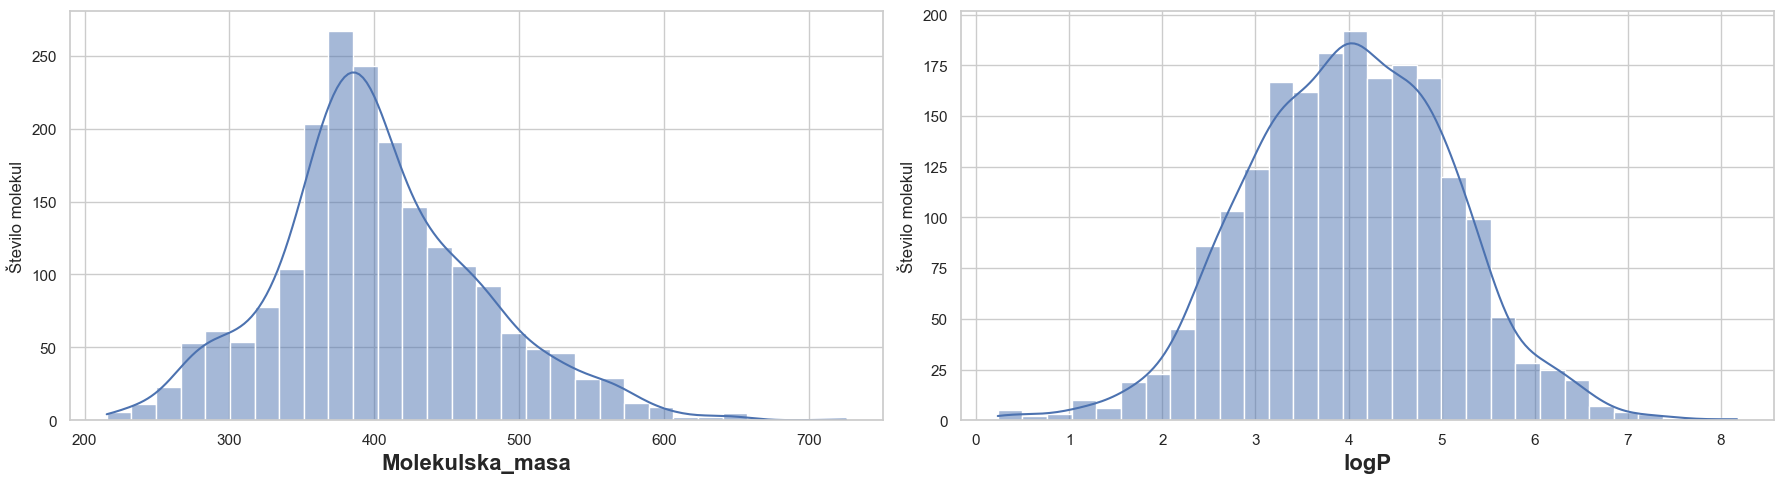

In [10]:
continuous_properties = ['Molekulska_masa', 'logP']

# properties = ['Molekulska_masa', 'logP', 'Število_O_atomov', 'Število_N_atomov', 'Akceptorji_H_vezi', 'Donorji_H_vezi','Število_aromatskih_obročev','TPSA','Število_rotirajočih_vezi']
# List of discrete properties to visualize
discrete_properties = ['Število_O_atomov', 'Število_N_atomov', 'Akceptorji_H_vezi', 'Donorji_H_vezi', 'Število_aromatskih_obročev', 'Število_rotirajočih_vezi']

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure with subplots for continuous properties
fig, axes = plt.subplots(nrows=1, ncols=len(continuous_properties), figsize=(18, 5))

# Loop through each continuous property and create a histogram
for i, prop in enumerate(continuous_properties):
    sns.histplot(molecules_analysis_rf[prop].dropna(), bins=30, kde=True, ax=axes[i])
    # axes[i].set_title(f'{prop}')
    axes[i].set_xlabel(prop,fontsize=16, fontweight='bold')
    axes[i].set_ylabel('Število molekul')

# Adjust layout for continuous properties
plt.tight_layout()
plt.show()

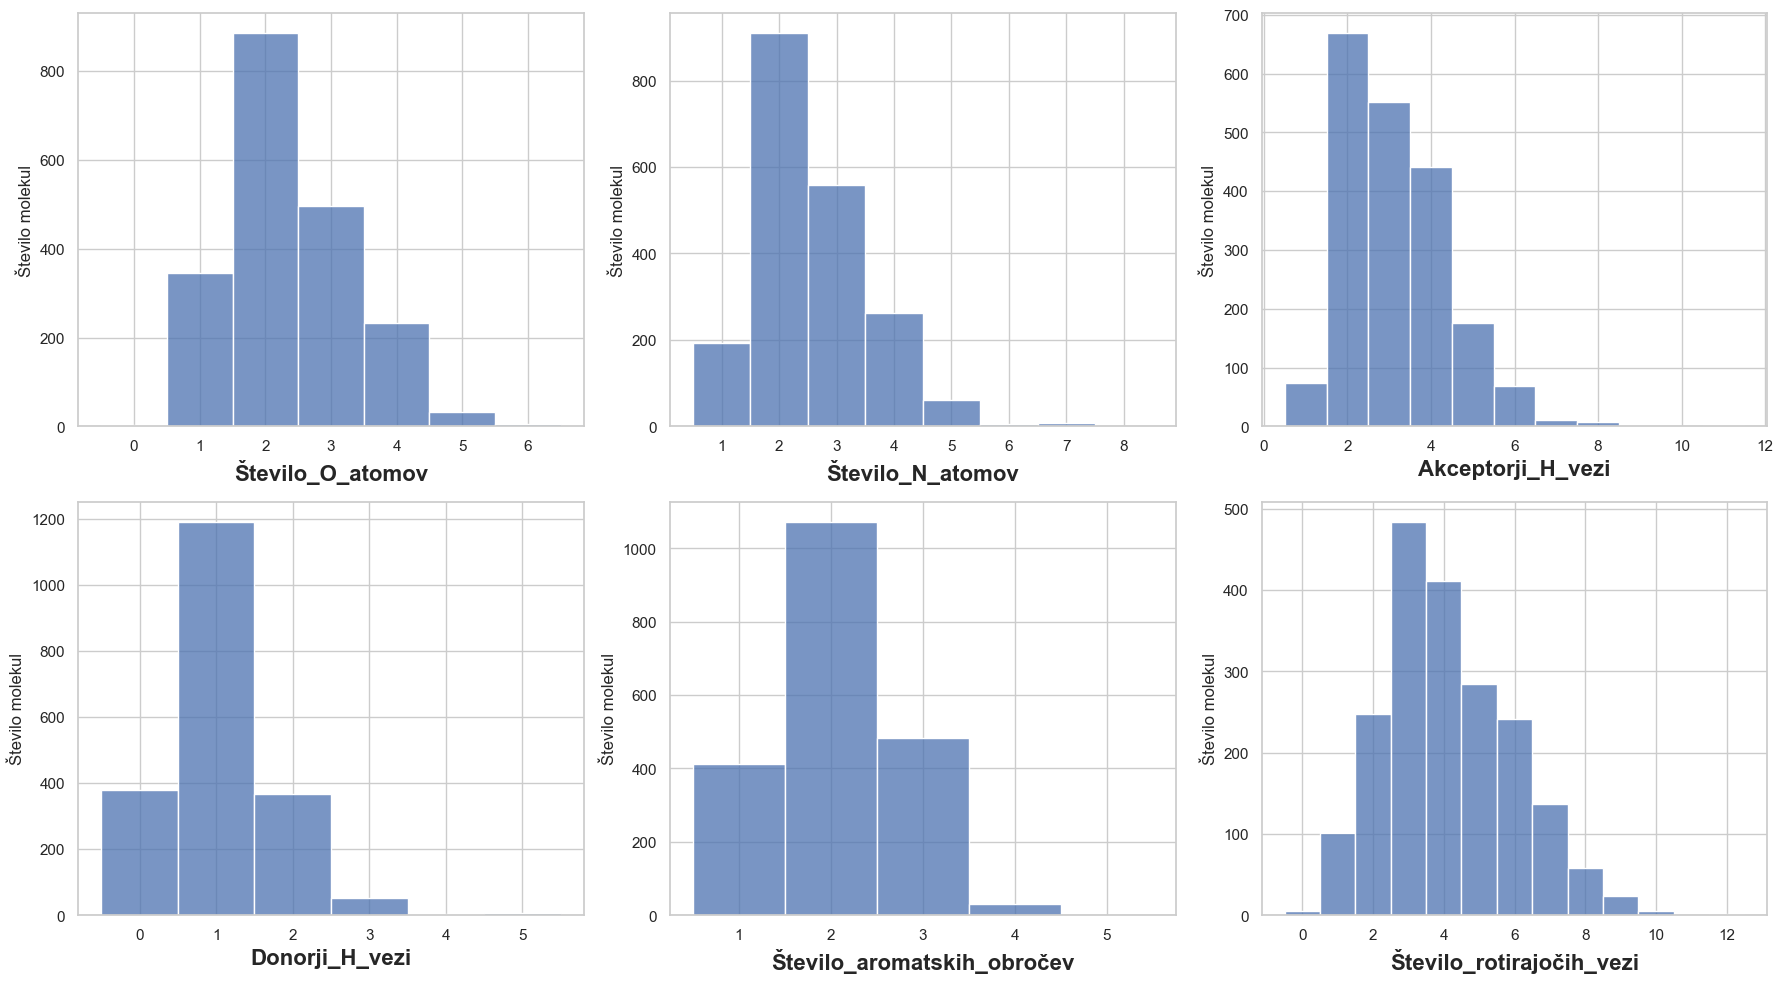

In [11]:
# Create a figure with subplots for discrete properties
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through each discrete property and create a histogram
for i, prop in enumerate(discrete_properties):
    sns.histplot(molecules_analysis_rf[prop].dropna(), bins=molecules_analysis_rf[prop].nunique(), discrete=True, ax=axes[i])
    # axes[i].set_title(f'Razporeditev {prop}')
    axes[i].set_xlabel(prop,fontsize=16, fontweight='bold')
    axes[i].set_ylabel('Število molekul')

# Remove any empty subplots if there are less than 6 properties
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for discrete properties
plt.tight_layout()
plt.show()

Molecules with Max Tanimoto Similarity > 0.85


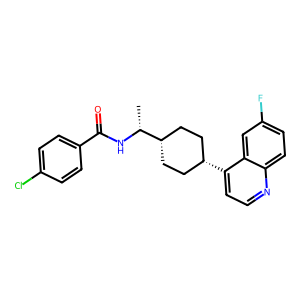

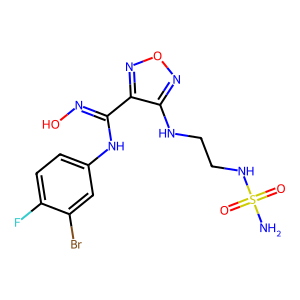

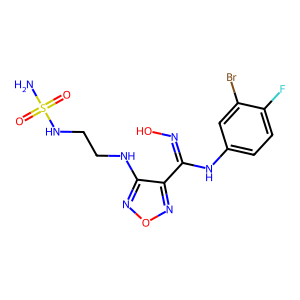

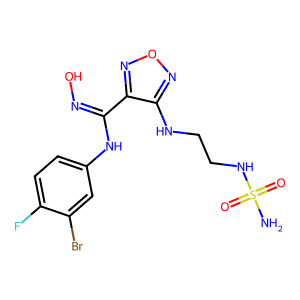

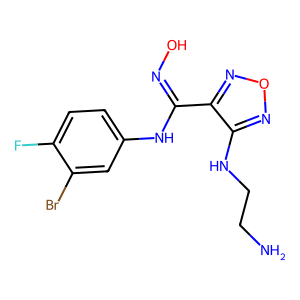

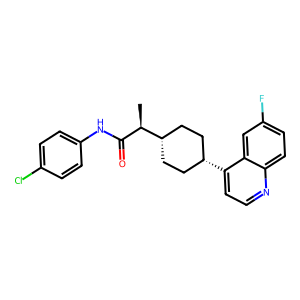

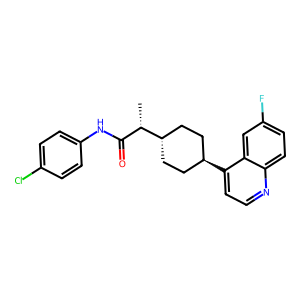

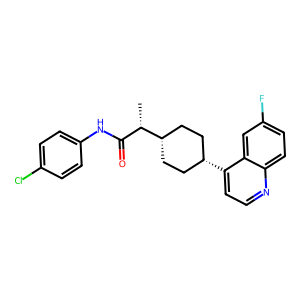

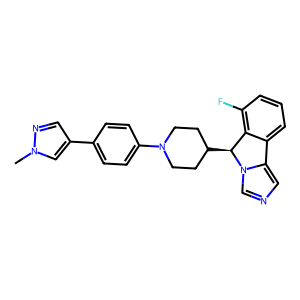

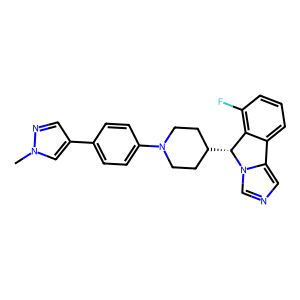

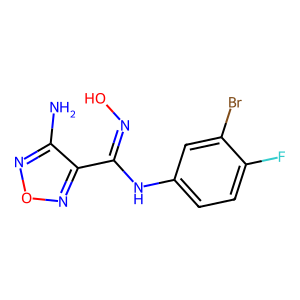

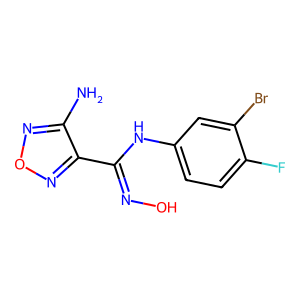

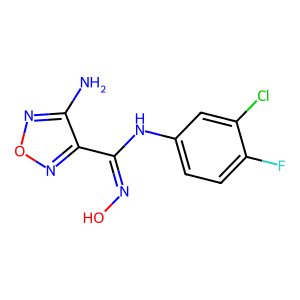

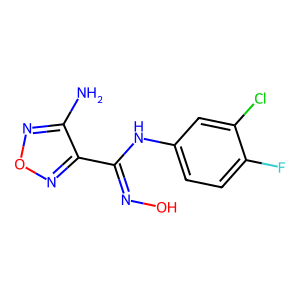

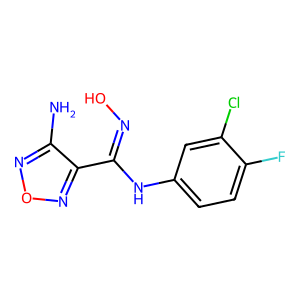

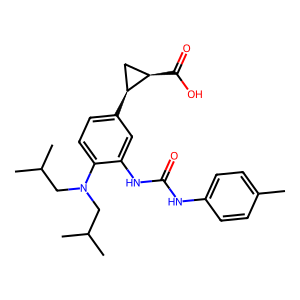

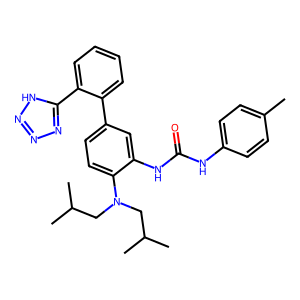

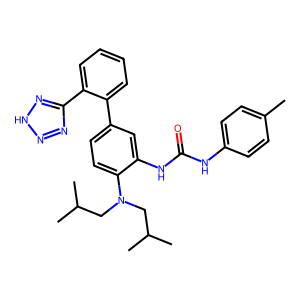

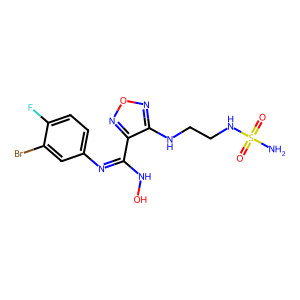

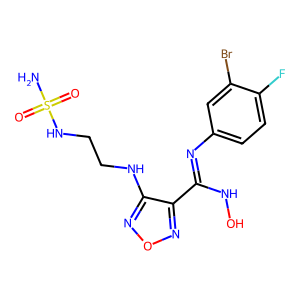

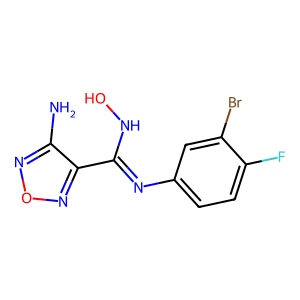

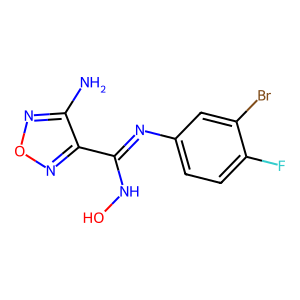

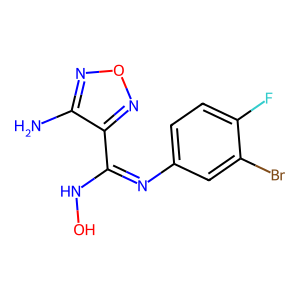

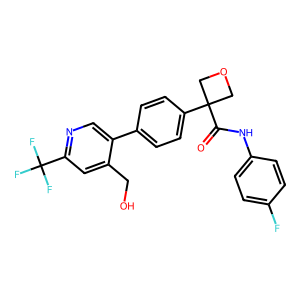

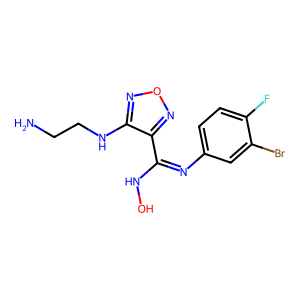

In [12]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
import pandas as pd
from IPython.display import display, HTML

# Filter molecules where Max Tanimoto Similarity > 0.85
high_similarity = predicted_active[predicted_active['Max_Tanimoto_Similarity'] > 0.85]

# Filter molecules where Max Tanimoto Similarity <= 0.85
low_similarity = predicted_active[predicted_active['Max_Tanimoto_Similarity'] <= 0.85]

# Function to display 2D molecular structures
def display_molecules(molecule_df):
    molecule_images = []
    for index, row in molecule_df.head(25).iterrows():
        smiles = row['Smiles']  # Assuming 'Smiles' column exists
        
        # Convert SMILES to a molecule object
        mol = Chem.MolFromSmiles(smiles)
        
        # Check if the molecule is valid
        if mol is not None:
            # Draw the molecule in 2D and append to the list
            img = Draw.MolToImage(mol)
            molecule_images.append((img, smiles))  # Store the image and SMILES as a tuple
        else:
            print(f"Invalid SMILES: {smiles}")
    
    # Display all images with SMILES below each image
    for img, smiles in molecule_images:
        display(img)
        display(HTML(f"<h4>SMILES: {smiles}</h4>"))  # Display the SMILES below the image

# Display molecules with high similarity (Max Tanimoto > 0.85)
print("Molecules with Max Tanimoto Similarity > 0.85")
display_molecules(high_similarity)

Molecules with Max Tanimoto Similarity <= 0.85


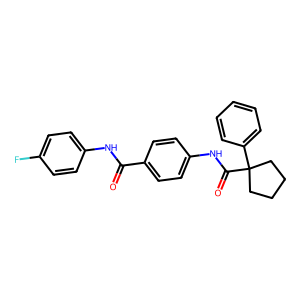

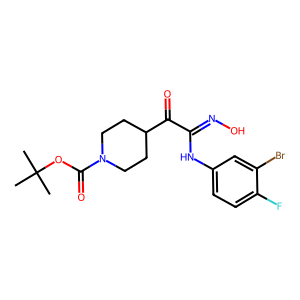

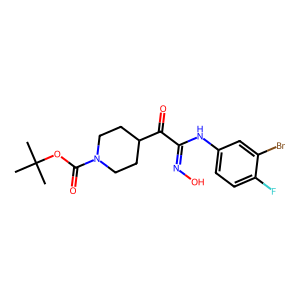

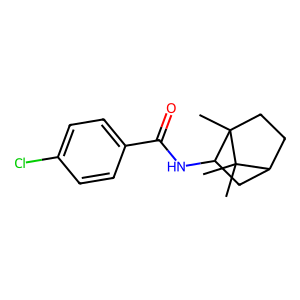

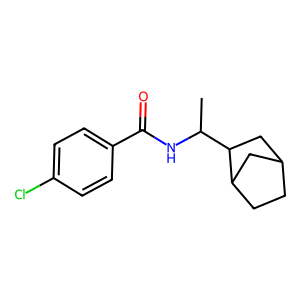

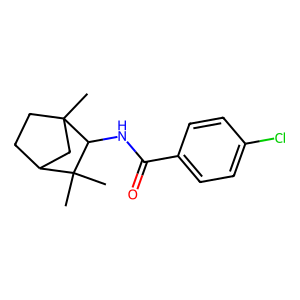

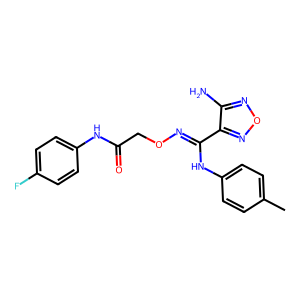

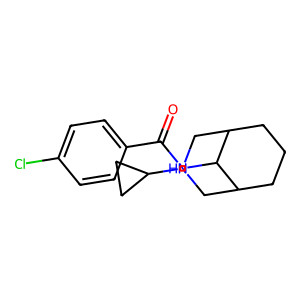

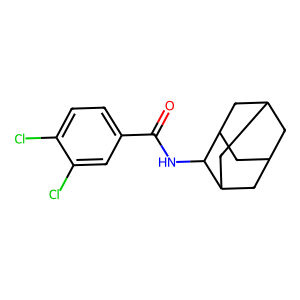

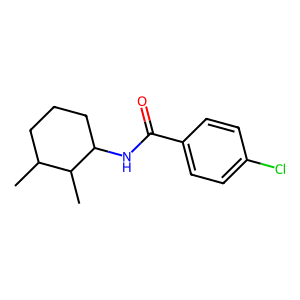

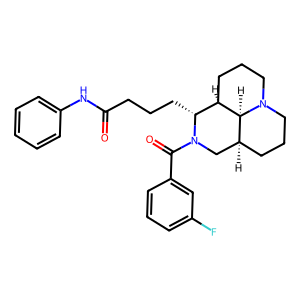

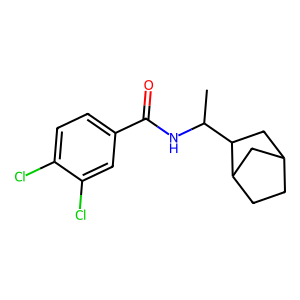

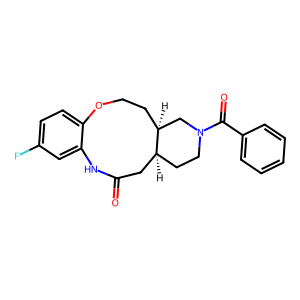

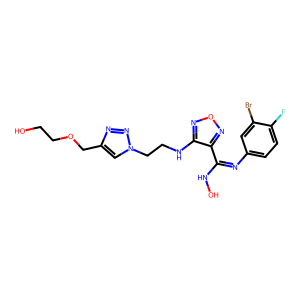

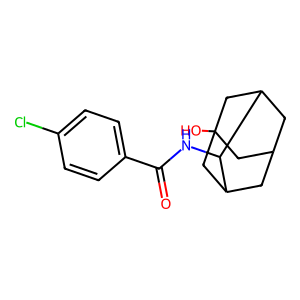

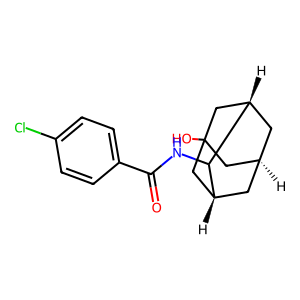

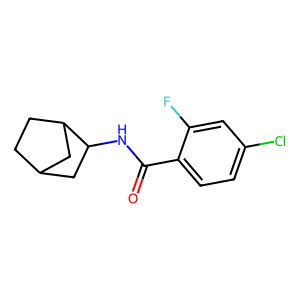

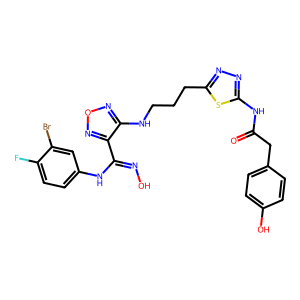

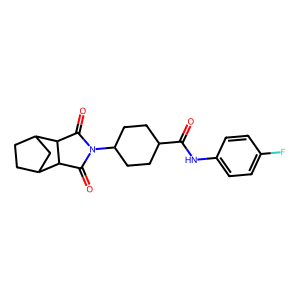

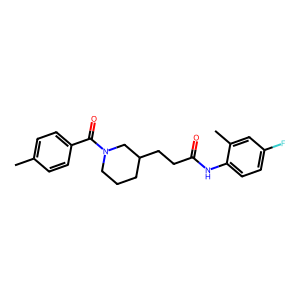

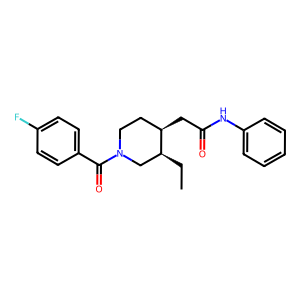

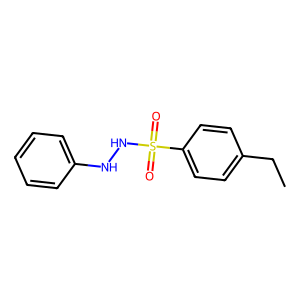

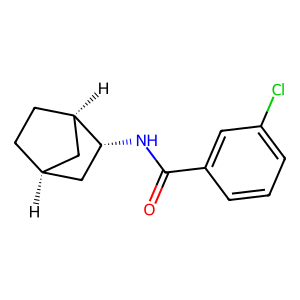

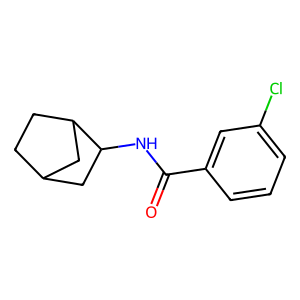

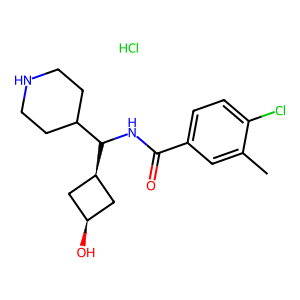

In [13]:
# Display molecules with low similarity (Max Tanimoto <= 0.85)
print("Molecules with Max Tanimoto Similarity <= 0.85")
display_molecules(low_similarity)

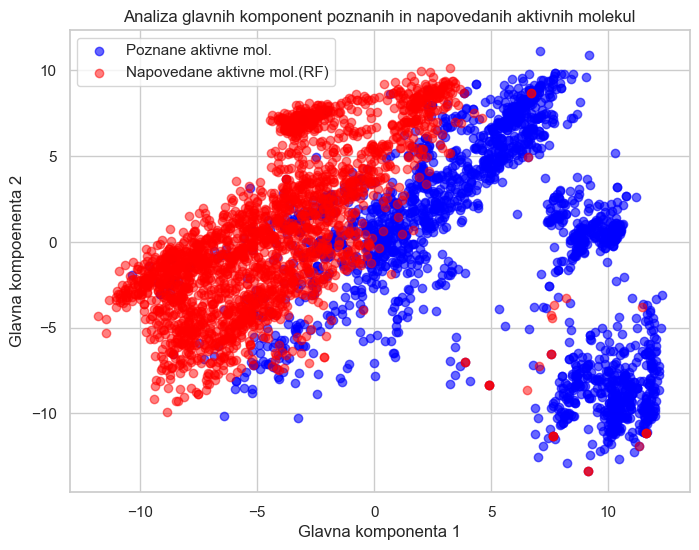

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming proven_active and predicted_active_rf are given as NumPy arrays
proven_active = proven_bits
predicted_active_rf = predicted_bits

# Combine both datasets for PCA
combined_data = np.vstack((proven_active, predicted_active_rf))

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(combined_data)

# Split back into original groups
pca_proven_active = pca_result[:len(proven_active)]
pca_predicted_active_rf = pca_result[len(proven_active):]

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(pca_proven_active[:, 0], pca_proven_active[:, 1], label="Poznane aktivne mol.", alpha=0.6, color='blue')
plt.scatter(pca_predicted_active_rf[:, 0], pca_predicted_active_rf[:, 1], label="Napovedane aktivne mol.(RF)", alpha=0.5, color='red')
plt.xlabel("Glavna komponenta 1")
plt.ylabel("Glavna kompoenenta 2")
plt.title("Analiza glavnih komponent poznanih in napovedanih aktivnih molekul")
plt.legend()
plt.show()

# Molekule modela SVM

In [15]:
best_molecules_svm = pd.read_csv(f'{kon.path_files}/podatki_napoved/most_active_filtered_svm.csv')
molecules_svm = best_molecules_svm[['Smiles', 'Predicted_Activity', 'Probability_Active']]
molecules_svm

,Smiles,Predicted_Activity,Probability_Active
0,C[C@@H](NC(=O)c1ccc(Cl)cc1)[C@H]1CC[C@H](CC1)c...,1,0.978715
1,CCn1cncc1C(=O)N1CCC(CC1)c1ccc(cn1)C(=O)Nc1ccc(...,1,0.976491
2,CC(C)C(=O)Nc1nc2cc(NS(=O)(=O)c3ccc(cc3)C3CCCCC...,1,0.974620
3,Cc1c(Br)ccc(F)c1C(=O)Nc1ccc(cc1)C1CCN(CC1)C(=O...,1,0.973860
4,CC(C)c1ccc(NC(=O)C2CCN(CC2)c2c(cnc3ccc(F)cc23)...,1,0.971987
...,...,...,...
2366,CC(C)CS(=O)(=O)N1CC2(CCN(CC(=O)Nc3ccc(C)c(F)c3...,1,0.892161
2367,CCOC(=O)N1CCc2c(C1)sc(NC(=O)c1ccc(cc1)S(=O)(=O...,1,0.892100
2368,Fc1ccc(NC(=O)O\N=c2\oc3cc4OC5(CCCCC5)CCc4cc3c3...,1,0.892090
2369,COc1cc(F)c(C(=O)N2CCC(CC2)c2ccc(NC(=O)c3ccc(cc...,1,0.892081


## Molekulski prstni odtisi rdkit empiricno dokazanih aktivnih molekul

In [16]:
input_dir2 = f'{kon.path_files}/molekulski_prstni_odtisi/df_circular.csv'
df_svm = pd.read_csv(input_dir2)

# Filter rows where Activity = 1
proven_active_circular = df_svm[df_svm['Activity'] == 1]
proven_active_circular.iloc[:, 2:]

,Activity,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,...,Bit_1014,Bit_1015,Bit_1016,Bit_1017,Bit_1018,Bit_1019,Bit_1020,Bit_1021,Bit_1022,Bit_1023
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2098,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2099,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2100,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2101,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Molekulski prstni odtisi circular napovedanih aktivnih molekul svm

In [17]:
predicted_active_svm, fingerprints_df = calc_fingerprints(molecules_svm, 'circular')
predicted_active_svm.iloc[:, 1:]

,Predicted_Activity,Probability_Active,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,...,Bit_1014,Bit_1015,Bit_1016,Bit_1017,Bit_1018,Bit_1019,Bit_1020,Bit_1021,Bit_1022,Bit_1023
0,1,0.978715,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.976491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.974620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.973860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.971987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2366,1,0.892161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2367,1,0.892100,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2368,1,0.892090,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2369,1,0.892081,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Tanimoto podobnost

In [18]:
import numpy as np
import pandas as pd

# Extract relevant columns as numpy arrays
proven_bits_c = proven_active_circular.iloc[:, 3:].values
predicted_bits_c = predicted_active_svm.iloc[:, 3:].values

# Compute Tanimoto similarity efficiently using broadcasting
intersection = np.dot(predicted_bits_c, proven_bits_c.T)  # Pairwise AND
sum_predicted = np.sum(predicted_bits_c, axis=1).reshape(-1, 1)  # Sum of predicted bits (row-wise)
sum_proven = np.sum(proven_bits_c, axis=1).reshape(1, -1)  # Sum of proven bits (column-wise)

union = sum_predicted + sum_proven - intersection  # Pairwise OR
tanimoto_similarity = intersection / union  # Tanimoto similarity matrix

# Find the maximum similarity for each predicted molecule (max similarity to any proven molecule)
max_similarity = tanimoto_similarity.max(axis=1)

# Find the average similarity for each predicted molecule (avg similarity to all proven molecules)
avg_similarity = tanimoto_similarity.mean(axis=1)


# Add both the max and avg Tanimoto similarity columns to predicted_active
predicted_active_svm['Max_Tanimoto_Similarity'] = max_similarity
predicted_active_svm['Avg_Tanimoto_Similarity'] = avg_similarity

# Optionally return the DataFrame for further use
predicted_active_svm

,Smiles,Predicted_Activity,Probability_Active,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,...,Bit_1016,Bit_1017,Bit_1018,Bit_1019,Bit_1020,Bit_1021,Bit_1022,Bit_1023,Max_Tanimoto_Similarity,Avg_Tanimoto_Similarity
0,C[C@@H](NC(=O)c1ccc(Cl)cc1)[C@H]1CC[C@H](CC1)c...,1,0.978715,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.159304
1,CCn1cncc1C(=O)N1CCC(CC1)c1ccc(cn1)C(=O)Nc1ccc(...,1,0.976491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.313725,0.159475
2,CC(C)C(=O)Nc1nc2cc(NS(=O)(=O)c3ccc(cc3)C3CCCCC...,1,0.974620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.283333,0.134812
3,Cc1c(Br)ccc(F)c1C(=O)Nc1ccc(cc1)C1CCN(CC1)C(=O...,1,0.973860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.312500,0.138319
4,CC(C)c1ccc(NC(=O)C2CCN(CC2)c2c(cnc3ccc(F)cc23)...,1,0.971987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.339130,0.148460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2366,CC(C)CS(=O)(=O)N1CC2(CCN(CC(=O)Nc3ccc(C)c(F)c3...,1,0.892161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.293578,0.136734
2367,CCOC(=O)N1CCc2c(C1)sc(NC(=O)c1ccc(cc1)S(=O)(=O...,1,0.892100,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.244755,0.112885
2368,Fc1ccc(NC(=O)O\N=c2\oc3cc4OC5(CCCCC5)CCc4cc3c3...,1,0.892090,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.256198,0.127938
2369,COc1cc(F)c(C(=O)N2CCC(CC2)c2ccc(NC(=O)c3ccc(cc...,1,0.892081,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.271930,0.140106


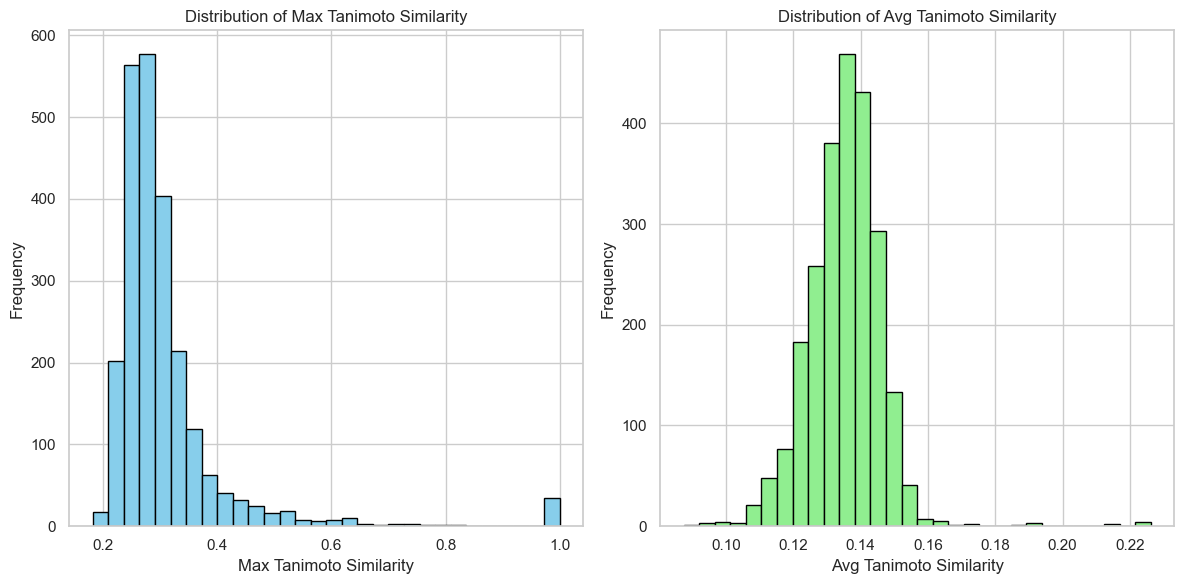

In [19]:
import matplotlib.pyplot as plt

# Plot the histogram for Max Tanimoto Similarity
plt.figure(figsize=(12, 6))

# Subplot 1: Max Tanimoto Similarity
plt.subplot(1, 2, 1)
plt.hist(predicted_active_svm['Max_Tanimoto_Similarity'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Max Tanimoto Similarity')
plt.xlabel('Max Tanimoto Similarity')
plt.ylabel('Frequency')

# Subplot 2: Avg Tanimoto Similarity
plt.subplot(1, 2, 2)
plt.hist(predicted_active_svm['Avg_Tanimoto_Similarity'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of Avg Tanimoto Similarity')
plt.xlabel('Avg Tanimoto Similarity')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

In [20]:
# List of properties to calculate and add to DataFrame
properties = ['Molekulska_masa', 'logP', 'Število_O_atomov', 'Število_N_atomov', 'Akceptorji_H_vezi', 'Donorji_H_vezi','Število_aromatskih_obročev','TPSA','Število_rotirajočih_vezi']

molecules_analysis_svm = molecules_svm.copy()

# Apply the function to each property and add the result as a new column
for prop in properties:
    molecules_analysis_svm[prop] = molecules_analysis_svm['Smiles'].apply(lambda x: calc_property(x, prop))

molecules_analysis_svm = molecules_analysis_svm.head(2000)

In [21]:
MW_stats = molecules_analysis_svm['Molekulska_masa'].describe()
logP_stats = molecules_analysis_svm['logP'].describe()
Aromatic_Rings_stats = molecules_analysis_svm['Število_aromatskih_obročev'].describe()
HBA_stats = molecules_analysis_svm['Akceptorji_H_vezi'].describe()
HBD_stats = molecules_analysis_svm['Donorji_H_vezi'].describe()
O_Count_stats = molecules_analysis_svm['Število_O_atomov'].describe()
N_Count_stats = molecules_analysis_svm['Število_N_atomov'].describe()

# Create a DataFrame to hold the statistics
stats_df_svm = pd.DataFrame({
    'Molekulska_masa': MW_stats,
    'logP': logP_stats,
    'Število_aromatskih_obročev': Aromatic_Rings_stats,
    'Akceptorji_H_vezi': HBA_stats,
    'Donorji_H_vezi': HBD_stats,
    'Število_O_atomov': O_Count_stats,
    'Število_N_atomov': N_Count_stats,
})

# Transpose the DataFrame to have the statistics as rows
stats_df_svm = stats_df_svm.transpose()
stats_df_svm

,count,mean,std,min,25%,50%,75%,max
Molekulska_masa,2000.0,439.788311,70.620305,264.3040,390.767000,433.53100,488.740000,1106.25900
logP,2000.0,4.161530,1.159628,0.2251,3.436725,4.19485,5.009625,8.49462
Število_aromatskih_obročev,2000.0,2.572500,0.740958,0.0000,2.000000,3.00000,3.000000,6.00000
Akceptorji_H_vezi,2000.0,4.420500,1.419397,1.0000,3.000000,4.00000,5.000000,14.00000
Donorji_H_vezi,2000.0,1.417500,0.663637,0.0000,1.000000,1.00000,2.000000,6.00000
Število_O_atomov,2000.0,2.737500,1.162011,0.0000,2.000000,3.00000,4.000000,11.00000
Število_N_atomov,2000.0,3.452500,1.235924,1.0000,2.000000,3.00000,4.000000,10.00000


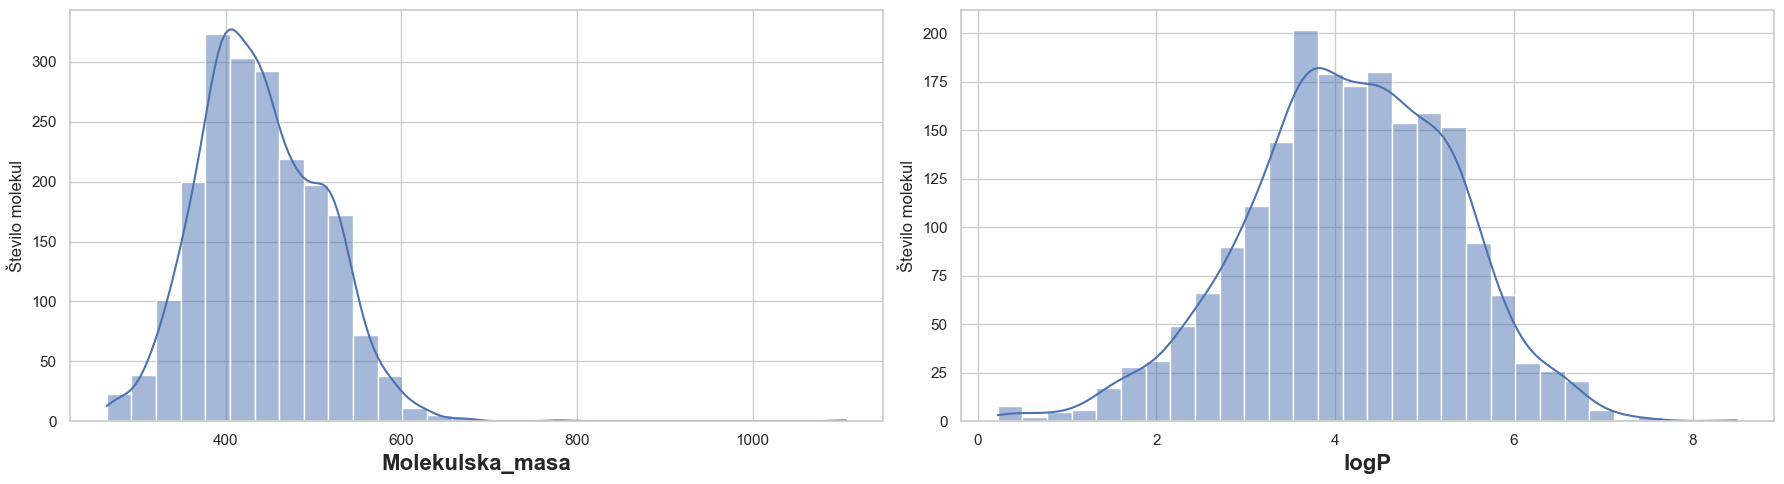

In [22]:
continuous_properties = ['Molekulska_masa', 'logP']

# properties = ['Molekulska_masa', 'logP', 'Število_O_atomov', 'Število_N_atomov', 'Akceptorji_H_vezi', 'Donorji_H_vezi','Število_aromatskih_obročev','TPSA','Število_rotirajočih_vezi']
# List of discrete properties to visualize
discrete_properties = ['Število_O_atomov', 'Število_N_atomov', 'Akceptorji_H_vezi', 'Donorji_H_vezi', 'Število_aromatskih_obročev', 'Število_rotirajočih_vezi']

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure with subplots for continuous properties
fig, axes = plt.subplots(nrows=1, ncols=len(continuous_properties), figsize=(18, 5))

# Loop through each continuous property and create a histogram
for i, prop in enumerate(continuous_properties):
    sns.histplot(molecules_analysis_svm[prop].dropna(), bins=30, kde=True, ax=axes[i])
    # axes[i].set_title(f'{prop}')
    axes[i].set_xlabel(prop,fontsize=16, fontweight='bold')
    axes[i].set_ylabel('Število molekul')

# Adjust layout for continuous properties
plt.tight_layout()
plt.show()

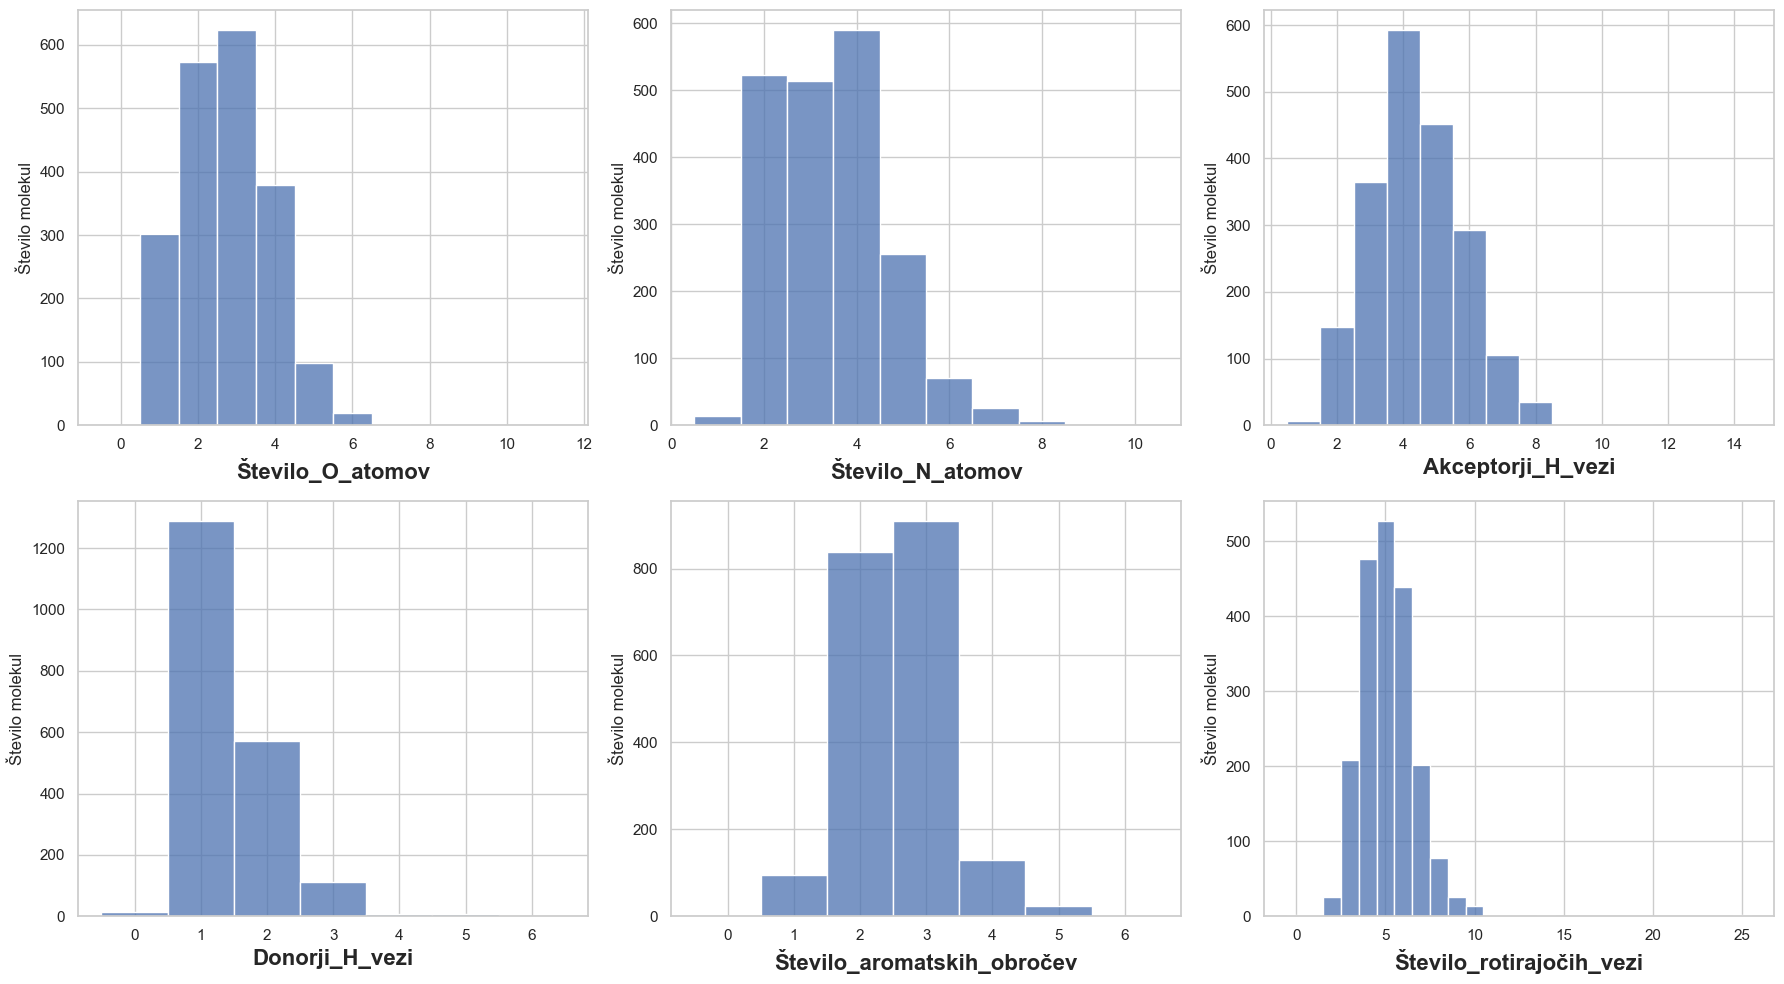

In [23]:
# Create a figure with subplots for discrete properties
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through each discrete property and create a histogram
for i, prop in enumerate(discrete_properties):
    sns.histplot(molecules_analysis_svm[prop].dropna(), bins=molecules_analysis_svm[prop].nunique(), discrete=True, ax=axes[i])
    # axes[i].set_title(f'Razporeditev {prop}')
    axes[i].set_xlabel(prop,fontsize=16, fontweight='bold')
    axes[i].set_ylabel('Število molekul')

# Remove any empty subplots if there are less than 6 properties
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for discrete properties
plt.tight_layout()
plt.show()

Molecules with Max Tanimoto Similarity > 0.85


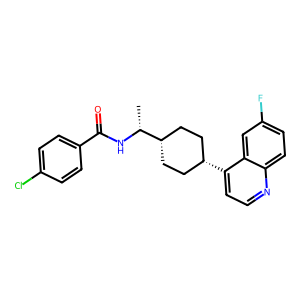

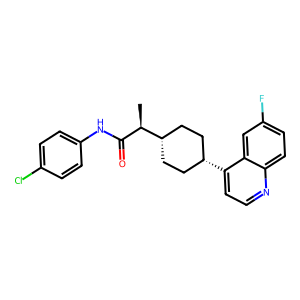

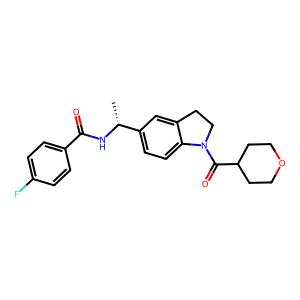

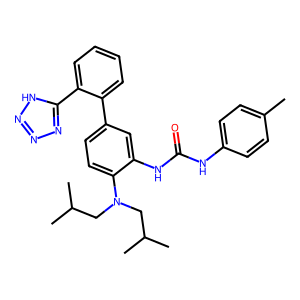

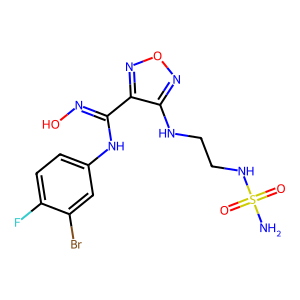

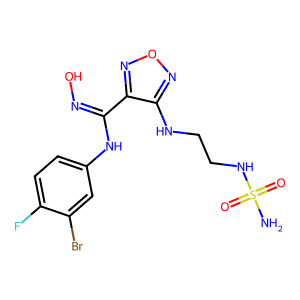

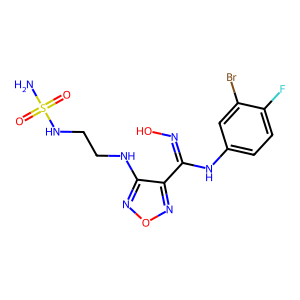

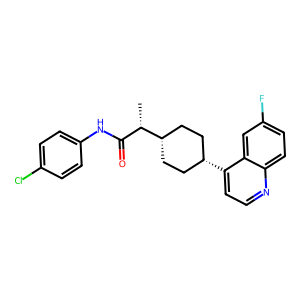

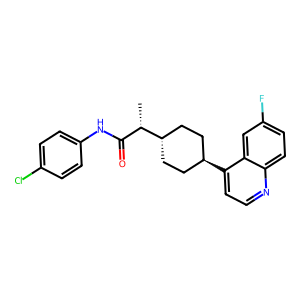

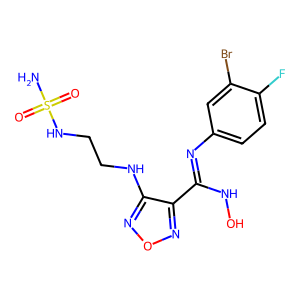

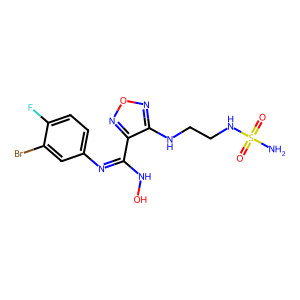

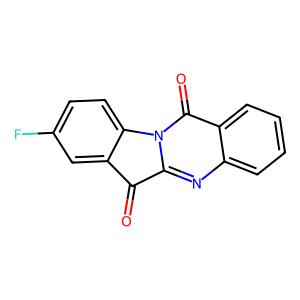

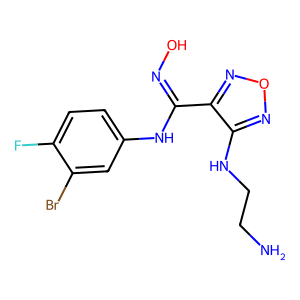

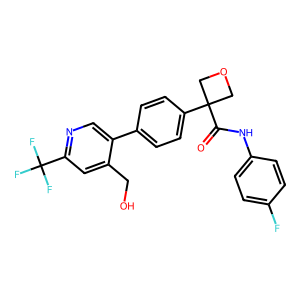

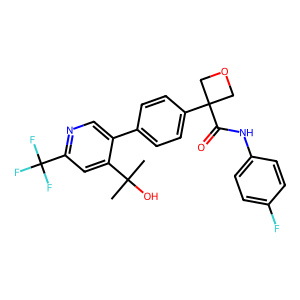

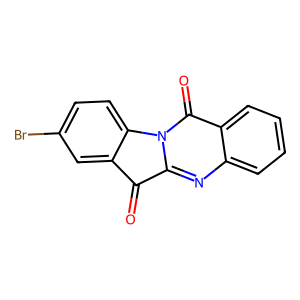

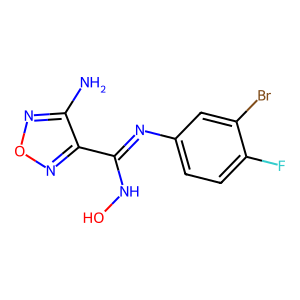

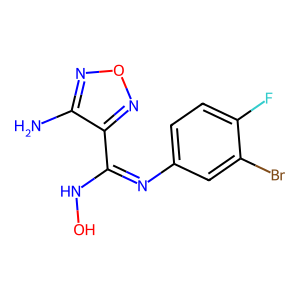

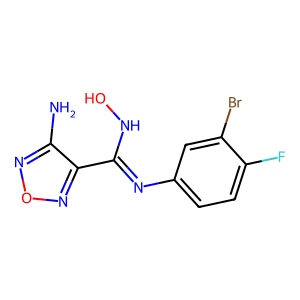

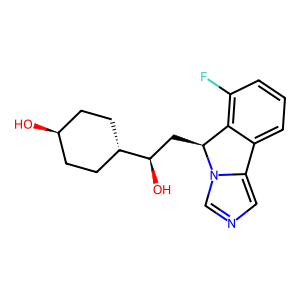

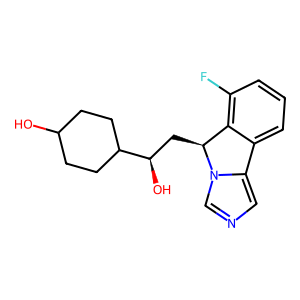

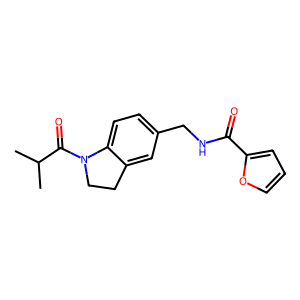

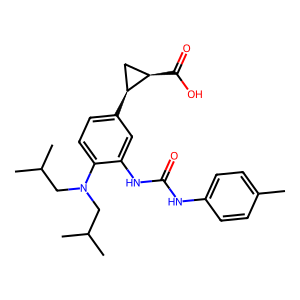

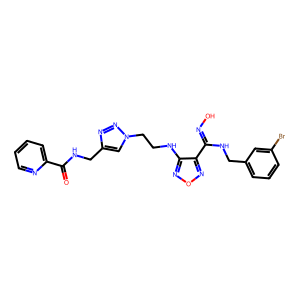

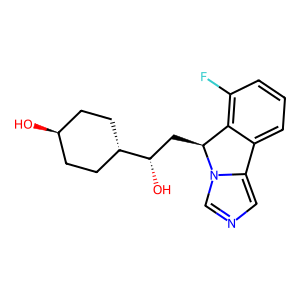

In [24]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
import pandas as pd
from IPython.display import display, HTML

# Filter molecules where Max Tanimoto Similarity > 0.85
high_similarity_svm = predicted_active_svm[predicted_active_svm['Max_Tanimoto_Similarity'] > 0.85]

# Filter molecules where Max Tanimoto Similarity <= 0.85
low_similarity_svm = predicted_active_svm[predicted_active_svm['Max_Tanimoto_Similarity'] <= 0.85]

# Function to display 2D molecular structures
def display_molecules(molecule_df):
    molecule_images = []
    for index, row in molecule_df.head(25).iterrows():
        smiles = row['Smiles']  # Assuming 'Smiles' column exists
        
        # Convert SMILES to a molecule object
        mol = Chem.MolFromSmiles(smiles)
        
        # Check if the molecule is valid
        if mol is not None:
            # Draw the molecule in 2D and append to the list
            img = Draw.MolToImage(mol)
            molecule_images.append((img, smiles))  # Store the image and SMILES as a tuple
        else:
            print(f"Invalid SMILES: {smiles}")
    
    # Display all images with SMILES below each image
    for img, smiles in molecule_images:
        display(img)
        display(HTML(f"<h4>SMILES: {smiles}</h4>"))  # Display the SMILES below the image

# Display molecules with high similarity (Max Tanimoto > 0.85)
print("Molecules with Max Tanimoto Similarity > 0.85")
display_molecules(high_similarity_svm)

Molecules with Max Tanimoto Similarity <= 0.85


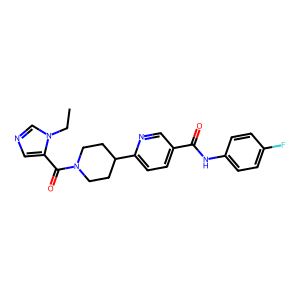

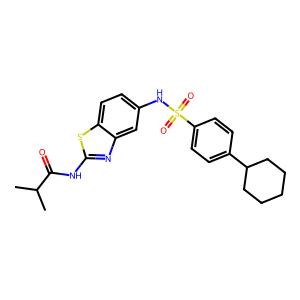

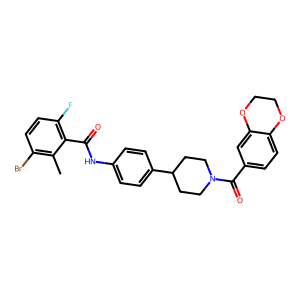

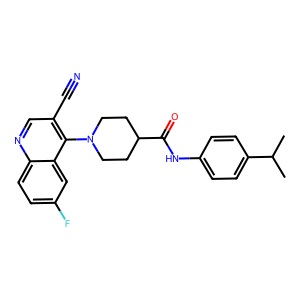

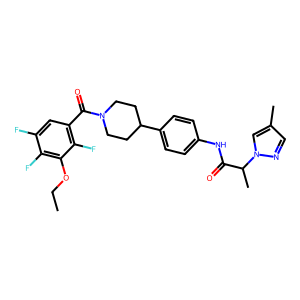

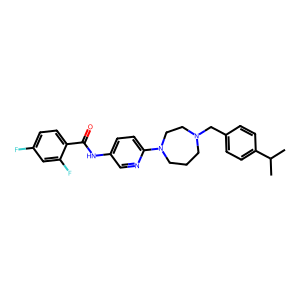

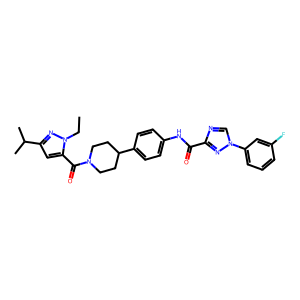

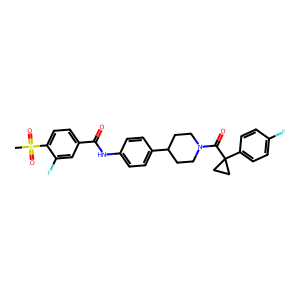

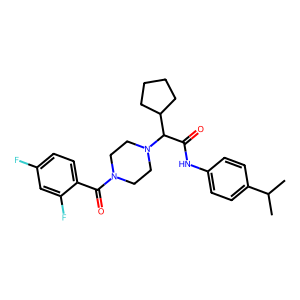

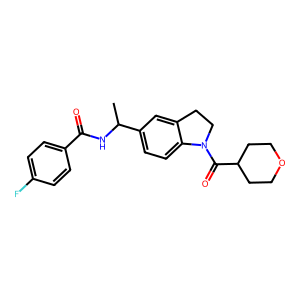

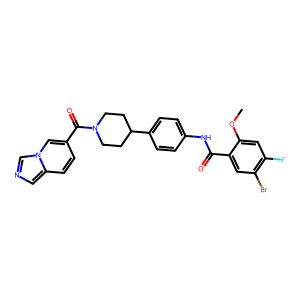

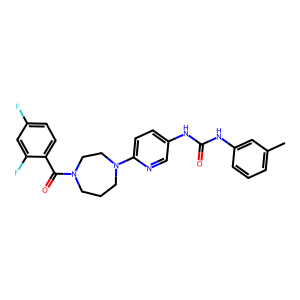

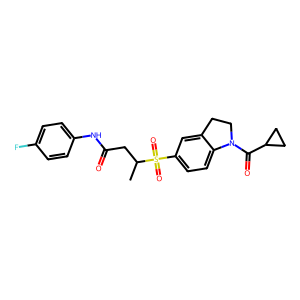

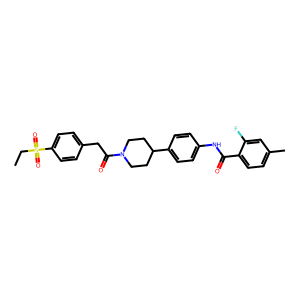

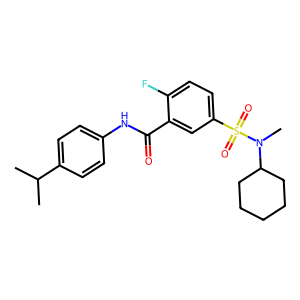

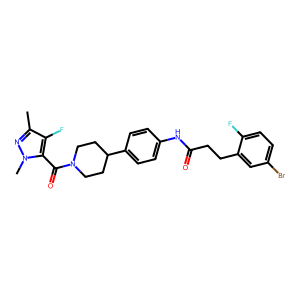

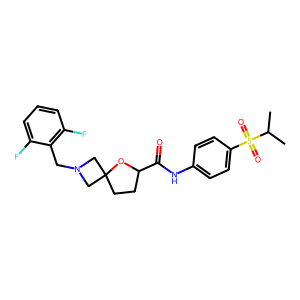

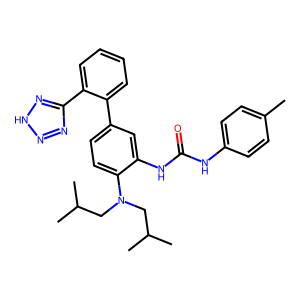

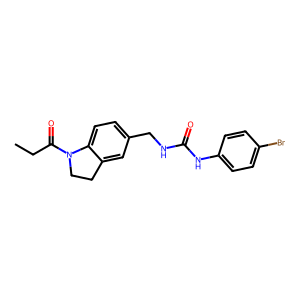

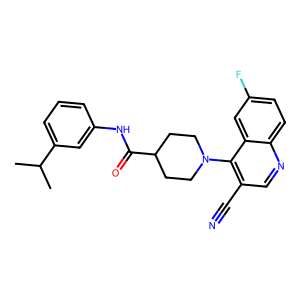

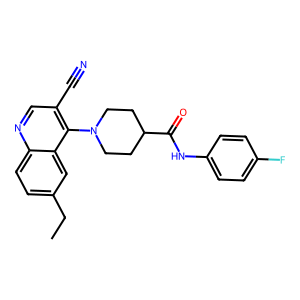

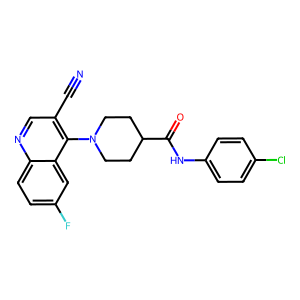

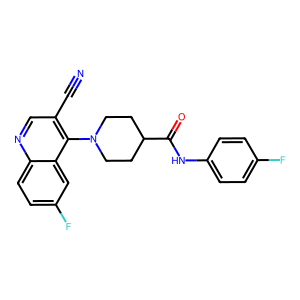

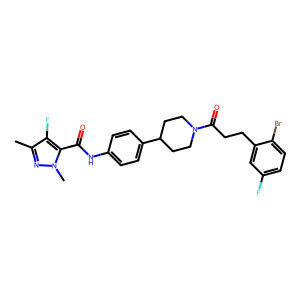

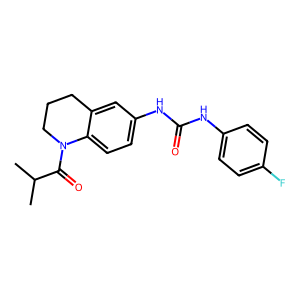

In [25]:
# Display molecules with low similarity (Max Tanimoto <= 0.85)
print("Molecules with Max Tanimoto Similarity <= 0.85")
display_molecules(low_similarity_svm)

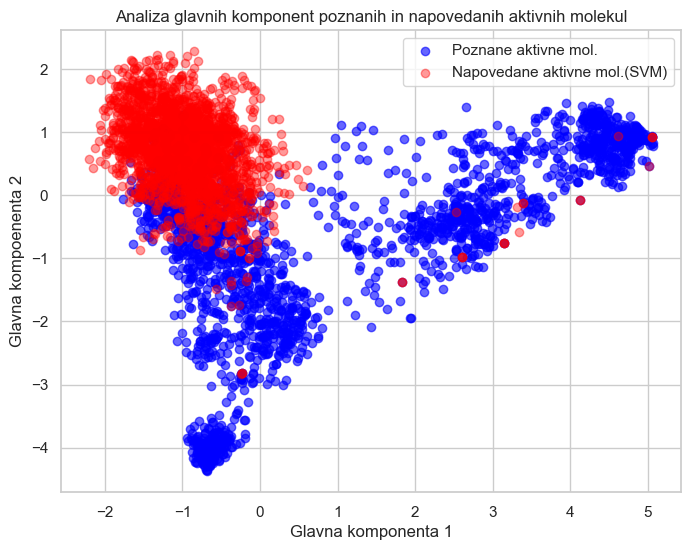

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming proven_active and predicted_active_rf are given as NumPy arrays
proven_active = proven_bits_c
predicted_active_rf = predicted_bits_c

# Combine both datasets for PCA
combined_data = np.vstack((proven_active, predicted_active_rf))

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(combined_data)

# Split back into original groups
pca_proven_active = pca_result[:len(proven_active)]
pca_predicted_active_rf = pca_result[len(proven_active):]

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(pca_proven_active[:, 0], pca_proven_active[:, 1], label="Poznane aktivne mol.", alpha=0.6, color='blue')
plt.scatter(pca_predicted_active_rf[:, 0], pca_predicted_active_rf[:, 1], label="Napovedane aktivne mol.(SVM)", alpha=0.4, color='red')
plt.xlabel("Glavna komponenta 1")
plt.ylabel("Glavna kompoenenta 2")
plt.title("Analiza glavnih komponent poznanih in napovedanih aktivnih molekul")
plt.legend()
plt.show()

# Molekule obeh modelov:

In [27]:
merged_df = pd.merge(molecules_rf[['Smiles', 'Probability_Active']], 
                      molecules_svm[['Smiles', 'Probability_Active']], 
                      on='Smiles', 
                      suffixes=('_rf', '_svm'))

# Display the resulting DataFrame
merged_df

,Smiles,Probability_Active_rf,Probability_Active_svm
0,C[C@@H](NC(=O)c1ccc(Cl)cc1)[C@H]1CC[C@H](CC1)c...,0.970152,0.978715
1,NS(=O)(=O)NCCNc1nonc1\C(Nc1ccc(F)c(Br)c1)=N\O,0.950978,0.962435
2,NS(=O)(=O)NCCNc1nonc1C(Nc1ccc(F)c(Br)c1)=NO,0.950978,0.962435
3,NS(=O)(=O)NCCNc1nonc1\C(Nc1ccc(F)c(Br)c1)=N/O,0.950978,0.962435
4,NCCNc1nonc1\C(Nc1ccc(F)c(Br)c1)=N/O,0.948135,0.945067
...,...,...,...
80,COc1ccc(cc1)C1(CCC1)C(=O)Nc1ccc(cc1)C1CCN(CC1)...,0.695823,0.942624
81,CCn1cncc1C(=O)N1CCCC(C1)c1ccc(cn1)C(=O)Nc1ccc(...,0.695040,0.938309
82,Fc1ccc(NC(=O)CCNS(=O)(=O)c2ccc3N(CCc3c2)C(=O)C...,0.694549,0.947878
83,CCOc1ncc(Cl)cc1C(=O)N1CCC(CC1)c1ccc(NC(=O)C2(C...,0.694424,0.908178


In [28]:
import pandas as pd

# Sample merged DataFrame (replace this with your actual merged DataFrame)
# merged_df = pd.DataFrame(...)

# Calculate the average of the two probability columns
merged_df['Average_Probability_Active'] = (merged_df['Probability_Active_rf'] + merged_df['Probability_Active_svm']) / 2

# Sort the DataFrame by the new average column in descending order
merged_df = merged_df.sort_values(by='Average_Probability_Active', ascending=False)
merged_df

,Smiles,Probability_Active_rf,Probability_Active_svm,Average_Probability_Active
0,C[C@@H](NC(=O)c1ccc(Cl)cc1)[C@H]1CC[C@H](CC1)c...,0.970152,0.978715,0.974434
2,NS(=O)(=O)NCCNc1nonc1C(Nc1ccc(F)c(Br)c1)=NO,0.950978,0.962435,0.956706
3,NS(=O)(=O)NCCNc1nonc1\C(Nc1ccc(F)c(Br)c1)=N/O,0.950978,0.962435,0.956706
1,NS(=O)(=O)NCCNc1nonc1\C(Nc1ccc(F)c(Br)c1)=N\O,0.950978,0.962435,0.956706
5,C[C@@H]([C@H]1CC[C@H](CC1)c1ccnc2ccc(F)cc12)C(...,0.924749,0.968929,0.946839
...,...,...,...,...
77,Cl.Cc1ccc(F)c(C(=O)NC([C@H]2C[C@H](O)C2)C2CCNC...,0.697353,0.900859,0.799106
75,Fc1ccc(CC(=O)Nc2ccc(cc2)C2CCN(CC2)C(=O)c2ccc(N...,0.698852,0.897587,0.798220
74,CC(C)(C)n1ccc(n1)C(=O)Nc1ccc(cc1)C1CCN(CC1)C(=...,0.699615,0.896134,0.797875
76,Cc1ccnc(n1)N1CCCC2(CCCN(C2)C(=O)Nc2ccc(F)c(F)c...,0.697650,0.893517,0.795583


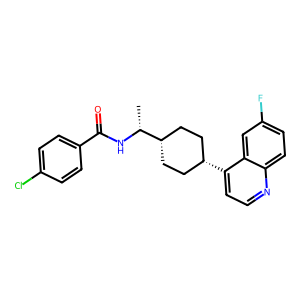

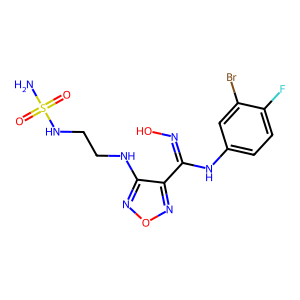

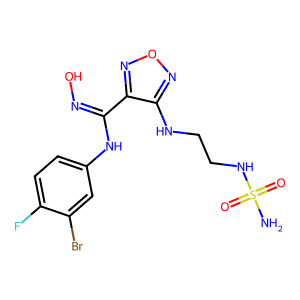

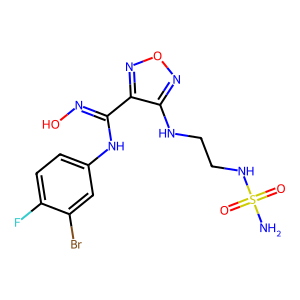

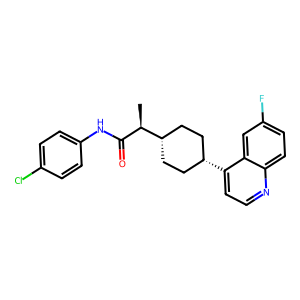

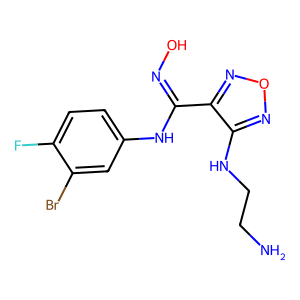

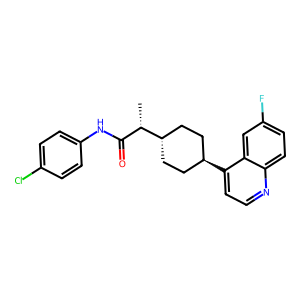

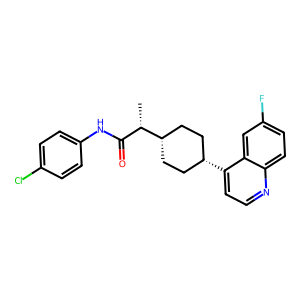

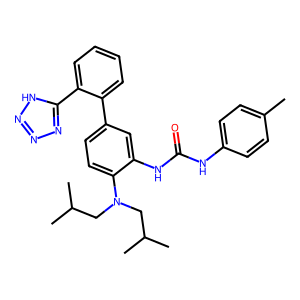

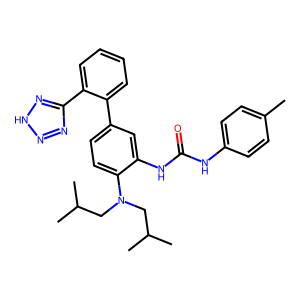

In [29]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
import pandas as pd
from IPython.display import display, HTML

# Sample DataFrame (replace this with your actual DataFrame)
# molecules_rf = pd.DataFrame(...)

# Assuming 'molecules_rf' is already sorted by 'Predicted_Activity' and you want the top 5
merged_df = merged_df.head(10)

# Generate 2D structures and visualize them
molecule_images = []
for index, row in merged_df.iterrows():
    smiles = row['Smiles']
    
    # Convert SMILES to a molecule
    mol = Chem.MolFromSmiles(smiles)
    
    # Check if the molecule is valid
    if mol is not None:
        # Draw the molecule in 2D and append to the list
        img = Draw.MolToImage(mol)
        molecule_images.append((img, smiles))  # Store the image and SMILES as a tuple
    else:
        print(f"Invalid SMILES: {smiles}")

# Display all images in the notebook with SMILES
for img, smiles in molecule_images:
    display(img)
    display(HTML(f"<h4>SMILES: {smiles}</h4>"))  # Display the SMILES below the image